Read Data

In [586]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mode
import math
import time

def read_excel(path, sheet_target): # read excel data
    global category
    data = pd.read_excel(path, sheet_name=sheet_target)
    return pd.DataFrame(data)

def reScale(data, method):
    global category
    if(method == 'std'):
        for i in category:
            data[i] = (data[i] - data[i].mean()) / data[i].std()
    elif(method == 'norm'):
        for i in category:
            data[i] = (data[i] - data[i].min())/data[i].std()
    
    return data

category = ['x1', 'x2', 'x3']
data = read_excel('traintest.xlsx', 'train')

Describing the data

In [587]:
data.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


In [588]:
data['y'].value_counts()

1    218
0     78
Name: y, dtype: int64

<AxesSubplot:>

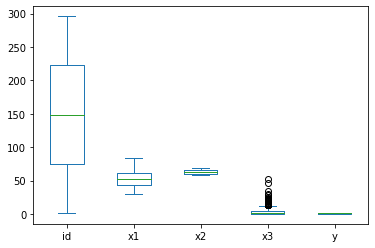

In [589]:
data.plot.box()

,id,x1,x2,x3,y
id,1.000000,-0.063703,0.003374,-0.022402,-0.048285
x1,-0.063703,1.000000,0.090546,-0.063453,-0.081001
x2,0.003374,0.090546,1.000000,-0.007058,0.023225
x3,-0.022402,-0.063453,-0.007058,1.000000,-0.292132
y,-0.048285,-0.081001,0.023225,-0.292132,1.000000


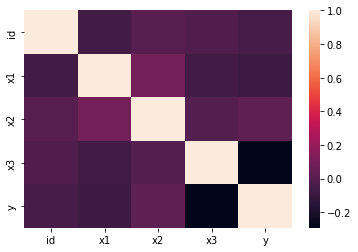

In [590]:
sns.heatmap(data.corr())
data.corr()

<AxesSubplot:xlabel='x2', ylabel='x1'>

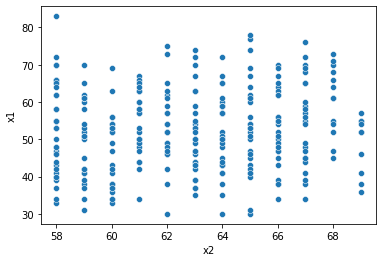

In [591]:
sns.scatterplot(x=data['x2'], y=data['x1'])

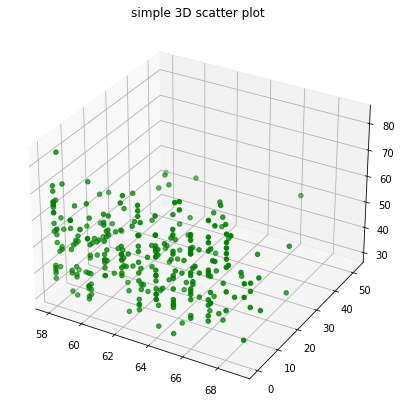

In [592]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = data['x1']
x = data['x2']
y = data['x3']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

We use standardization to make our algorithm easier to find the neighbor

In [593]:
reScaled = reScale(data, 'std')
reScaled

,id,x1,x2,x3,y
0,1,0.691713,0.345804,-0.563849,1
1,2,0.141071,-0.891149,0.944691,0
2,3,1.150582,-0.272673,2.453232,0
3,4,-1.694403,-0.891149,-0.563849,1
4,5,-1.327308,1.891995,2.316092,0
...,...,...,...,...,...
291,292,0.599940,0.345804,-0.426709,1
292,293,1.150582,1.273518,-0.563849,1
293,294,0.049297,0.655042,1.081831,0
294,295,0.416392,0.345804,-0.426709,0


Data describing after we do standardization scaling

<AxesSubplot:xlabel='x1', ylabel='x2'>

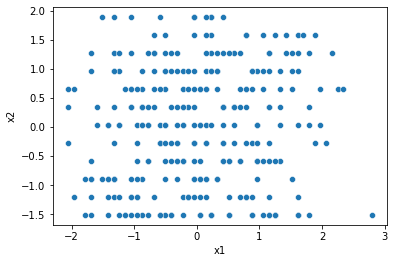

In [594]:
sns.scatterplot(x=reScaled['x1'], y=reScaled['x2'])

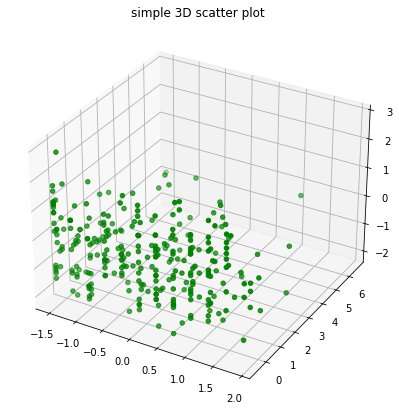

In [595]:
# Creating dataset
z = reScaled['x1']
x = reScaled['x2']
y = reScaled['x3']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

<AxesSubplot:>

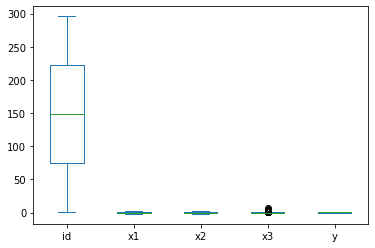

In [596]:
reScaled.plot.box()

,id,x1,x2,x3,y
id,1.000000,-0.063703,0.003374,-0.022402,-0.048285
x1,-0.063703,1.000000,0.090546,-0.063453,-0.081001
x2,0.003374,0.090546,1.000000,-0.007058,0.023225
x3,-0.022402,-0.063453,-0.007058,1.000000,-0.292132
y,-0.048285,-0.081001,0.023225,-0.292132,1.000000


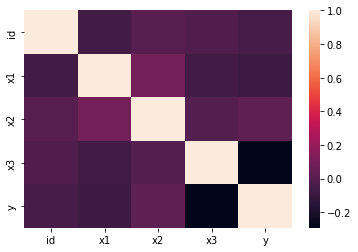

In [597]:
sns.heatmap(data.corr())
data.corr()

<AxesSubplot:xlabel='x3', ylabel='y'>

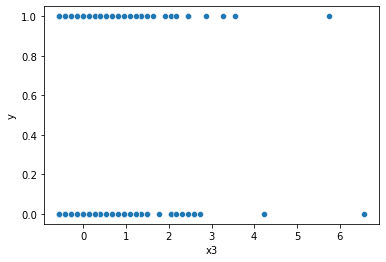

In [598]:
sns.scatterplot(x=reScaled['x3'], y=reScaled['y'])

Cross-Validation based on index

In [599]:
def cross_data(train_data, total):
    fold = train_data.shape[0]//total
    split_loc = []
    a = 0
    b = fold-1
    for i in range(total):
        split_loc.append([a,b])
        a += fold
        b += fold
    return split_loc

Find distance with Euclidean

In [600]:
def euclidean(X_train, X_test, i, j):
    #a = np.array([X_train['x1'][j], X_train['x2'][j]])
    #b = np.array([X_test['x1'][i], X_test['x2'][i]])
    a = np.array([X_train['x1'][j], X_train['x2'][j],X_train['x3'][j]])
    b = np.array([X_test['x1'][i], X_test['x2'][i],X_test['x3'][i]])
    eu_dist = np.linalg.norm(b-a)
    return eu_dist

Find distance with Manhattan

In [601]:
def manhattanDist(X_train, X_test, i, j):
    a = np.array([X_train['x1'][j], X_train['x2'][j],X_train['x3'][j]])
    b = np.array([X_test['x1'][i], X_test['x2'][i],X_test['x3'][i]])
    eu_dist = np.abs(a[:None]- b).sum(-1)
    return abs(eu_dist)

Find distance with Minkowski

In [602]:
def minkowski(X_train, X_test, i, j, p = 3): # test or X_test
    #a = np.array(X_test[category[0]][i],X_test[category[1]][i])
    #b = np.array(X_train[category[0]][j],X_train[category[1]][j])
    a = np.array([X_train['x1'][j], X_train['x2'][j],X_train['x3'][j]])
    b = np.array([X_test['x1'][i], X_test['x2'][i],X_test['x3'][i]])

    eu_dist = np.abs(a[:None]- b).sum(-1) ** p
    return eu_dist ** (1/p)

Find distance with Supremum

In [603]:
def supremum(X_train, X_test, i, j): # test or X_test
    train = np.array([X_train['x1'][j], X_train['x2'][j],X_train['x3'][j]])
    test = np.array([X_test['x1'][i], X_test['x2'][i],X_test['x3'][i]])

    return max([abs(train[l] - test[l]) for l in range(len(train))])

Find the closest neighbor

In [604]:
def closest_neighbor(train_data, validate_data,k, method, debug):
    closest = []
    for i in range(len(validate_data)):
        temp = []
        for j in range(len(train_data)):
            if(method == 'eu'):
                temp.append([train_data['id'][j], euclidean(train_data, validate_data, i, j)])
            elif(method == 'manhat'):
                temp.append([train_data['id'][j], manhattanDist(train_data, validate_data, i, j)])
            elif(method == 'mink'):
                temp.append([train_data['id'][j], minkowski(train_data, validate_data, i, j)])
            elif(method == 'supre'):
                temp.append([train_data['id'][j], supremum(train_data, validate_data, i, j)])
        temp = sorted(temp, key=lambda l: l[1])[0:k]
        closest.append({'vali_id': validate_data['id'][i], 'closest': list(map(lambda c : c[0], [c for c in temp]))})
    if(debug):
        print(closest)
    return closest

kNN algorithm

In [605]:
def kNN(train_data, validate_data, k, method, debug, run_as):
    neighbor = closest_neighbor(train_data, validate_data,k, method, debug)
    prediction_arr = []
    for i in range(len(validate_data)):
        truth_value = []
        for j in neighbor[i]['closest']:
            truth_value.append(int(train_data.iloc[np.where(train_data['id'] == j)]['y']))
        prediction_arr.append(mode(truth_value))
    if(run_as == 'train'):
        validate_data['prediction'] = prediction_arr
    elif(run_as == 'predict'):
        validate_data['y'] = prediction_arr
        if(debug):
            print(validate_data)

    return validate_data
            

Confussion matrix to evaluate the model (k value)

In [606]:
def confussion_matrix(trained):
    tp, fp, fn, tn = 0,0,0,0
    for i in range(trained.shape[0]):
        if((trained['y'][i] == 1) and (trained['prediction'][i] == 1)): tp += 1
        elif((trained['y'][i] == 0) and (trained['prediction'][i] == 1)): fp += 1
        elif((trained['y'][i] == 1) and (trained['prediction'][i] == 0)): fn += 1
        elif((trained['y'][i] == 0) and (trained['prediction'][i] == 0)): tn += 1
    
    l = 10**(-10)
    acc =  ((tp+tn)/(tp+fp+tn+fn+l))*100
    prec = (tp/(tp+fp+l))*100
    spec = (tn/(tn+fp+l))*100
    recc = (tp/(tp+fn+l))*100
    f1 = 2*((prec*recc)/(prec+recc+l))
    miss = fn / (fn + tp+l)
    mathew = ((tp*tn) - (fp*fn)) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)+l)
    acc_ball = (recc+spec)/2
    return {'Accuracy' : acc, 'Precision' : prec, 'Specificity' : spec, 'Recall' : recc, 'F1':f1, 'Miss_Rate':miss, 'Accuracy_Balance':acc_ball, 'Mathew_Correlation': mathew,'Matrix':(tp,fp,fn,tn)}

Training driver

In [607]:
def training_model(data, method, debug, run_as, reScale_method, fold_total):
    data = reScale(data, reScale_method)
    training_conclusion = []
    acc_array = []
    split_loc = cross_data(data, fold_total)
    for i in split_loc:
        acc_array = []
        validate_data = data[i[0]:i[1]]
        train_data = data.drop(data.index[i[0]:i[1]])
        for k in range(1, 20, 2):    
            trained = kNN(train_data.reset_index(), validate_data.reset_index(), k, method, debug, run_as)
            cof_matrix = confussion_matrix(trained)
            acc_array.append([k, cof_matrix['Accuracy'],cof_matrix])
        training_conclusion.append(acc_array)
    return (training_conclusion, split_loc)

Find the most optimal model

> based on k alone (not used)

In [608]:
def k_optimal(model_conclusion):
    optimal_k = []
    for i in range(len(model_conclusion)):
        optimal_k.append(max(model_conclusion[i], key=lambda l: l[1])[0])
    
    return mode(optimal_k)

> based on the model and its k

In [609]:
def model_optimal(model_conclusion, split_index):
    c = []
    for j in range(len(split_index)):
        a = (max(model_conclusion[j], key=lambda l: l[1])[0])
        loc = [i for i, t in enumerate(model_conclusion[j]) if t[0]==a]
        c.append([j,loc[0]])
    high_index = c[0]
    for x in c:
        if(model_conclusion[x[0]][x[1]][1] >= model_conclusion[high_index[0]][high_index[1]][1]):
            high_index = x

    return (split_index[high_index[0]], model_conclusion[high_index[0]][high_index[1]][0], model_conclusion[high_index[0]][high_index[1]][2])


Predict the 'test' dataset

In [610]:
def test_prediction(data, test_data, k_value, method, debug, run_as, reScale_method, model_index,via):
    data = reScale(data, reScale_method)
    if(via == 'model'):
        data = data.drop(data.index[model_index[0]:model_index[1]])
        data = data.reset_index()
    print(data.shape[0])
    test_data = reScale(test_data, reScale_method)
    prediction = kNN(data, test_data, k_value, method, debug, run_as)
    return prediction

In [611]:
def model_report(knn_method, optimal_k, reScale_method, fold_total, end_time, start_time, model_grade):
    print(f'<Model configuration>\nAlgorithm : KNN\nDistance Method : {knn_method}\nK Value : {optimal_k}\nScaling Method : {reScale_method}\nCross-Validation : {fold_total} folds')
    print(f"Training Time : {end_time-start_time}s")
    print("Model Quality :")
    for i in model_grade:
        if(i == 'Matrix'):
            print('<-> Confussion Matrix')
            print(f'    {model_grade[i][0]}\t{model_grade[i][1]}')
            print(f'    {model_grade[i][2]}\t{model_grade[i][3]}')
        else:
            print(f'<-> {i} : {model_grade[i]}')

Run the model training

In [612]:
data = read_excel('traintest.xlsx', 'train')
via = 'model'
reScale_method = 'std'
fold_total = 8
knn_method = 'eu'
start_time = time.time()
model_conclusion, split_index = training_model(data, knn_method, False, 'train', reScale_method, fold_total)

In [613]:
for k in range(len(split_index)):
    print(split_index[k])
    for l in range(len(model_conclusion[k])):
        print(f' {model_conclusion[k][l]}')

if(via == 'model'):
    model_index, model_k, model_grade = model_optimal(model_conclusion, split_index)
elif(via == 'k_only'):
    model_k = k_optimal(model_conclusion)

end_time = time.time()

[0, 36]
 [1, 58.33333333317129, {'Accuracy': 58.33333333317129, 'Precision': 74.9999999996875, 'Specificity': 33.33333333296296, 'Recall': 66.66666666641976, 'F1': 70.58823529379102, 'Miss_Rate': 0.3333333333320988, 'Accuracy_Balance': 49.999999999691354, 'Mathew_Correlation': 0.0, 'Matrix': (18, 6, 9, 3)}]
 [3, 63.88888888871141, {'Accuracy': 63.88888888871141, 'Precision': 81.81818181780991, 'Specificity': 55.55555555493827, 'Recall': 66.66666666641976, 'F1': 73.4693877547527, 'Miss_Rate': 0.3333333333320988, 'Accuracy_Balance': 61.11111111067902, 'Mathew_Correlation': 0.19738550848793057, 'Matrix': (18, 4, 9, 5)}]
 [5, 66.66666666648148, {'Accuracy': 66.66666666648148, 'Precision': 79.99999999968, 'Specificity': 44.444444443950616, 'Recall': 74.07407407379974, 'F1': 76.92307692273116, 'Miss_Rate': 0.25925925925829907, 'Accuracy_Balance': 59.259259258875176, 'Mathew_Correlation': 0.1740776559556977, 'Matrix': (20, 5, 7, 4)}]
 [7, 66.66666666648148, {'Accuracy': 66.66666666648148, 'Pr

Model Report

In [614]:
model_report(knn_method, model_k, reScale_method, fold_total, end_time, start_time, model_grade)

<Model configuration>
Algorithm : KNN
Distance Method : eu
K Value : 11
Scaling Method : std
Cross-Validation : 8 folds
Training Time : 27.491809129714966s
Model Quality :
<-> Accuracy : 88.88888888864197
<-> Precision : 87.09677419326744
<-> Specificity : 55.55555555493827
<-> Recall : 99.99999999962964
<-> F1 : 93.10344827549127
<-> Miss_Rate : 0.0
<-> Accuracy_Balance : 77.77777777728396
<-> Mathew_Correlation : 0.6956083436402515
<-> Confussion Matrix
    27	4
    0	5


Run the prediction

In [615]:
data = read_excel('traintest.xlsx', 'train')
test_data = read_excel('traintest.xlsx', 'test')
if(via=='k_only'):
    print('Total dataset : ', end="")
    prediction = test_prediction(data, test_data, model_k, 'eu', False, 'predict', reScale_method, model_index,via)
elif(via=='model'):
    print('Total dataset : ', end="")
    prediction = test_prediction(data, test_data, model_k, 'eu', False, 'predict', reScale_method, model_index,via)

Total dataset : 260


Prediction Result

In [616]:
prediction

,id,x1,x2,x3,y
0,297,-1.166456,-0.795495,0.393919,1
1,298,1.843752,1.060660,-1.181758,1
2,299,0.714924,-0.530330,1.181758,0
3,300,-0.413904,0.265165,1.181758,0
4,301,-0.915605,-0.530330,-1.181758,1
5,302,0.213223,-1.060660,-0.393919,1
6,303,0.464074,1.060660,1.181758,0
7,304,-1.291881,1.856155,-0.393919,1
8,305,-0.288478,-0.795495,0.393919,1
9,306,0.840350,-0.530330,-1.181758,1
